In [ ]:
import os
import numpy as np
import pandas as pd

meta = pd.read_csv("../data/processed/metadata/metadata.csv")
print(meta.head())

first_feat_rel = meta.loc[0, "feature_path"]
first_feat_abs = os.path.join("..", first_feat_rel)

feat = np.load(first_feat_abs)
print("Feature vector shape:", feat.shape)


                                        clip                 species  label  \
0           Mourning_Dove_268216_chunk00.wav           Mourning Dove      3   
1  Black-capped_Chickadee_420409_chunk02.wav  Black-capped Chickadee      2   
2          American_Robin_825256_chunk12.wav          American Robin      1   
3          American_Robin_825256_chunk06.wav          American Robin      1   
4          American_Robin_771921_chunk09.wav          American Robin      1   

                                        feature_path  
0  data/processed/features/Mourning_Dove_268216_c...  
1  data/processed/features/Black-capped_Chickadee...  
2  data/processed/features/American_Robin_825256_...  
3  data/processed/features/American_Robin_825256_...  
4  data/processed/features/American_Robin_771921_...  
Feature vector shape: (26,)


In [ ]:
print("Total clips:", len(meta))
print("Metadata shape:", meta.shape)   


Total clips: 6315
Metadata shape: (6315, 4)


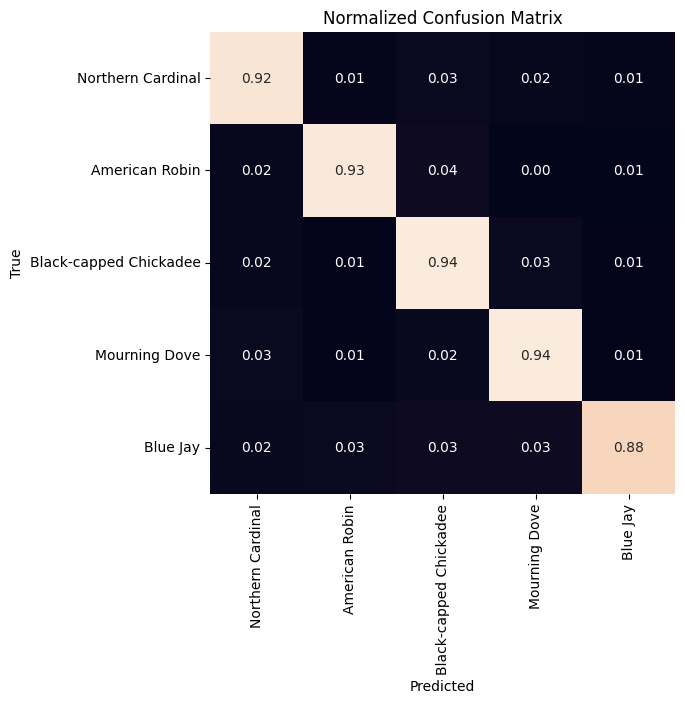

In [ ]:
import os
import yaml
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cfg = yaml.safe_load(open("../src/config.yaml"))

meta = pd.read_csv("../data/processed/metadata/metadata.csv")

X = np.vstack([np.load(os.path.join("..", fp)) for fp in meta["feature_path"]])
y = meta["label"].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize="true")
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".2f",
            xticklabels=cfg["species"],
            yticklabels=cfg["species"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()


In [12]:
import pandas as pd
meta = pd.read_csv("../data/processed/metadata/metadata.csv")
print(meta.head())
print(meta["call_type"].value_counts())


                                        clip                 species  label  \
0           Mourning_Dove_268216_chunk00.wav           Mourning Dove      3   
1  Black-capped_Chickadee_420409_chunk02.wav  Black-capped Chickadee      2   
2          American_Robin_825256_chunk12.wav          American Robin      1   
3          American_Robin_825256_chunk06.wav          American Robin      1   
4          American_Robin_771921_chunk09.wav          American Robin      1   

           call_type                                       feature_path  
0           nest coo  data/processed/features/Mourning_Dove_268216_c...  
1               song  data/processed/features/Black-capped_Chickadee...  
2  call, vesper song  data/processed/features/American_Robin_825256_...  
3  call, vesper song  data/processed/features/American_Robin_825256_...  
4               song  data/processed/features/American_Robin_771921_...  
call_type
song                                        2687
call                  

In [ ]:
meta['call_type'].value_counts().sort_index().reset_index()

,call_type,count
0,alarm call,243
1,"alarm call, call",106
2,"alarm call, call, pumphandle, piping monotone ...",102
3,"alarm call, jeer, pumphandle, rattle",18
4,"alarm call, song",29
...,...,...
57,wing noise,3
58,wing sound,1
59,wing sounds on flushing and flying again,2
60,wingbeats,2


In [ ]:
def normalize_call_type(raw):
    if not isinstance(raw, str):
        return "other"
    raw = raw.lower()
    if "song" in raw:
        return "song"
    if "alarm" in raw:
        return "alarm"
    if "call" in raw:
        return "call"
    return "other"

# Apply it
meta["call_class"] = meta["call_type"].apply(normalize_call_type)

meta['call_class'].value_counts().sort_index().reset_index()


,call_class,count
0,alarm,469
1,call,1668
2,other,211
3,song,3967
